In [12]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import python_auditory_toolbox.auditory_toolbox as pat
import python_auditory_toolbox.auditory_toolbox_torch as patt
import torch


In [13]:
def erb_GandM1990(f_hz, q=9.3, bwmin=24.7):
    '''
    -------------------------------------------------------------------
    Returns the equivalent rectangular bandwidth (ERB) at a 
    frequency f (in Hz), using Glasberg and Moore's equation
    --------------------------------------------------------------------
    
    Input parameters:
    f_hz     = frequency (Hz)
    q        = q factor (default 9.3) 
    bwmin    = bwmin factor (default 24.7)
    
    Output parameters:
    erb      = equivalent rectangular bandwidth (Hz)
    '''
    erb = bwmin * (f_hz/(q*bwmin) +1)

    return erb


def erbtohz_GandM1990(f_erb, q=9.3, bwmin=24.7):
    '''
    -------------------------------------------------------------------
    Transforms a frequency from units of ERB number to units of Hz,
    using Glasberg and Moore's equation
    --------------------------------------------------------------------
    
    Input parameters:
    f_hz     = frequency (Hz)
    q        = q factor (default 9.3) 
    bwmin    = bwmin factor (default 24.7)
    
    Output parameters:
    erb      = equivalent rectangular bandwidth (Hz)
    '''

    f_hz = q * bwmin * (np.exp(f_erb/q) -1)

    return f_hz


Text(0.5, 1.0, 'Gammatone (ERB) Filterbank Response')

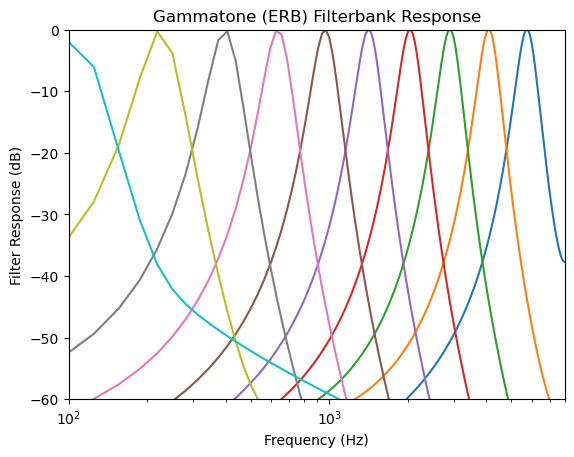

In [14]:

SAMPLE_RATE = 16000
NUM_CHAN = 10  # need to figure out number and spacing of channels such that each channel is 1-ERB wide
LOW_FREQ = 100


# Compute filterbank coefficients
fcoefs = pat.MakeErbFilters(SAMPLE_RATE, NUM_CHAN, LOW_FREQ)
# Measure impulse response of each filter
chan = NUM_CHAN//2
impulse_len = 512
x = np.zeros(impulse_len)
x[0] = 1
y = pat.ErbFilterBank(x,fcoefs)

# Plot the frequency response of each filter
resp = 20*np.log10(np.abs(np.fft.fft(y.T, axis=0)))
plt.semilogx(np.arange(impulse_len)*(SAMPLE_RATE/impulse_len),resp)
plt.xlim(100, SAMPLE_RATE/2)
plt.ylim(-60, 0)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter Response (dB)')
plt.title('Gammatone (ERB) Filterbank Response')

Text(0.5, 1.0, 'Gammatone (ERB) Filterbank Response')

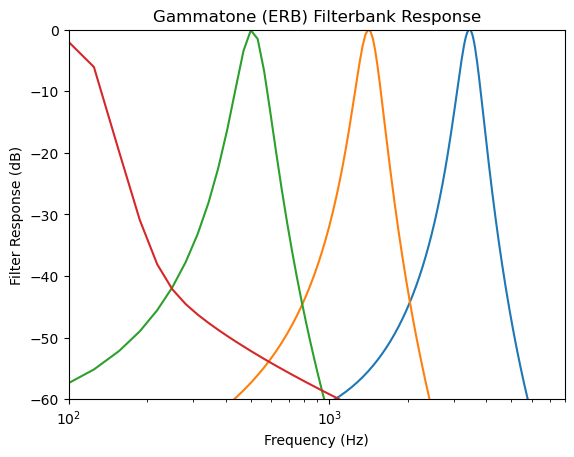

In [15]:
NUM_CHAN = 4
# Compute filterbank coefficients
fcoefs = pat.MakeErbFilters(SAMPLE_RATE, NUM_CHAN, LOW_FREQ)
# Measure impulse response of each filter
chan = NUM_CHAN//2
impulse_len = 512
x = np.zeros(impulse_len)
x[0] = 1
y = pat.ErbFilterBank(x,fcoefs)

# Plot the frequency response of each filter
resp = 20*np.log10(np.abs(np.fft.fft(y.T, axis=0)))
plt.semilogx(np.arange(impulse_len)*(SAMPLE_RATE/impulse_len),resp)
plt.xlim(100, SAMPLE_RATE/2)
plt.ylim(-60, 0)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter Response (dB)')
plt.title('Gammatone (ERB) Filterbank Response')

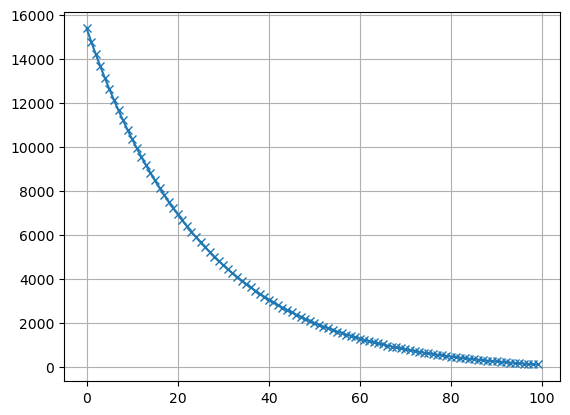

In [16]:
SAMPLE_RATE = 44100
fsp = pat.ErbSpace(low_freq=LOW_FREQ, high_freq=16000)
plt.plot(fsp,'x-')
plt.grid(True)

Text(0, 0.5, 'Filter Response (dB)')

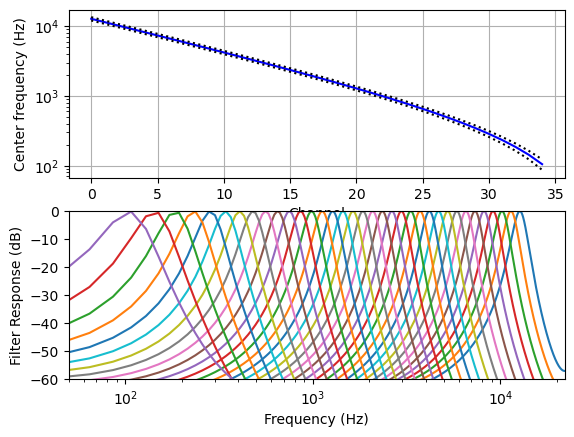

In [27]:
# Numpy implementation
erbs = np.flipud(np.arange(3,38)+0.5)
cf = erbtohz_GandM1990(erbs)
chanerbhz = erb_GandM1990(cf)
chan = range(len(cf))
plt.subplot(2,1,1)
plt.semilogy(chan,cf,'b-',chan,cf+chanerbhz/2,'k:',chan,cf-chanerbhz/2,'k:')
plt.grid(True)
plt.xlabel('Channel')
plt.ylabel('Center frequency (Hz)')

# Compute filterbank coefficients
fcoefs = pat.MakeErbFilters(SAMPLE_RATE, cf)
# Measure impulse response of each filter
impulse_len = 2048
x = np.zeros(impulse_len)
x[0] = 1
y = pat.ErbFilterBank(x,fcoefs)

# Plot the frequency response of each filter
resp = 20*np.log10(np.abs(np.fft.fft(y.T, axis=0)))
plt.subplot(2,1,2)
plt.semilogx(np.arange(impulse_len)*(SAMPLE_RATE/impulse_len),resp)
plt.xlim(50, SAMPLE_RATE/2)
plt.ylim(-60, 0)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter Response (dB)')


Text(0, 0.5, 'Filter Response (dB)')

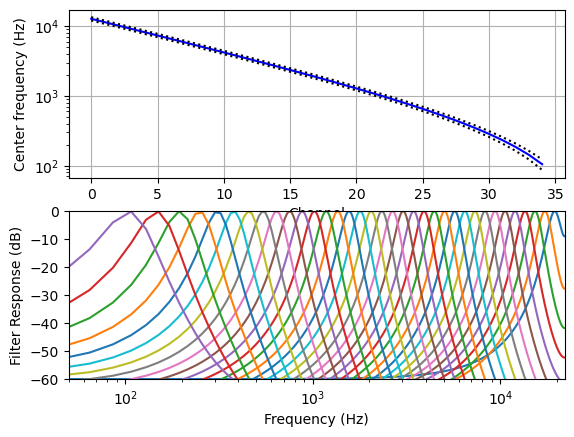

In [29]:
#Pytorch implementation
import python_auditory_toolbox.auditory_toolbox_torch as patt
erbs = np.flipud(np.arange(3,38)+0.5)

cf = erbtohz_GandM1990(erbs)
chanerbhz = erb_GandM1990(cf)
chan = range(len(cf))
plt.subplot(2,1,1)
plt.semilogy(chan,cf,'b-',chan,cf+chanerbhz/2,'k:',chan,cf-chanerbhz/2,'k:')
plt.grid(True)
plt.xlabel('Channel')
plt.ylabel('Center frequency (Hz)')
device = torch.device('mps')


# Compute filterbank coefficients
fbank = patt.ErbFilterBank(sampling_rate=44100,num_channels=len(cf),lowest_frequency=np.min(cf))
fbank.to(device=device,dtype=torch.float32)

# Measure impulse response of each filter
impulse_len = 2048
x = torch.zeros(1,impulse_len,dtype=torch.float32,device=device)
x[0,0] = 1
y = fbank(x)


# Plot the frequency response of each filter
resp = 20*np.log10(np.abs(np.fft.fft(y.cpu().numpy(), axis=-1)))
plt.subplot(2,1,2)
plt.semilogx(np.arange(impulse_len)*(SAMPLE_RATE/impulse_len),np.swapaxes(np.squeeze(resp),0,1))
plt.xlim(50, SAMPLE_RATE/2)
plt.ylim(-60, 0)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter Response (dB)')

In [24]:
x.shape

torch.Size([1, 2048])